## Statistics
Having a solid understanding of statistics in data science allows us to understand our data better, and allows us to create a quantifiable evaluation of any future conclusions.

In [20]:
using Pkg
# Pkg.add("StatsBase")
# Pkg.add("RDatasets")
# Pkg.add("StatsPlots")
# Pkg.add("KernelDensity")
# Pkg.add("Distributions")
# Pkg.add("HypothesisTests")
# Pkg.add("MLBase")

In [19]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

In this notebook, we will use eruption data on the faithful geyser. The data will contain wait times between every consecutive times the geyser goes off and the length of the eruptions.
<img src="data/faithful.JPG" width="400">

Let's get the data first...

In [25]:
# we are accessing R and its data sets -- within those data sets, we pick out the faithful data set
D = dataset("datasets","faithful")
@show names(D)
D

names(D) = ["Eruptions", "Waiting"]


Row,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [27]:
describe(D) # let's get some descriptive statistics

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


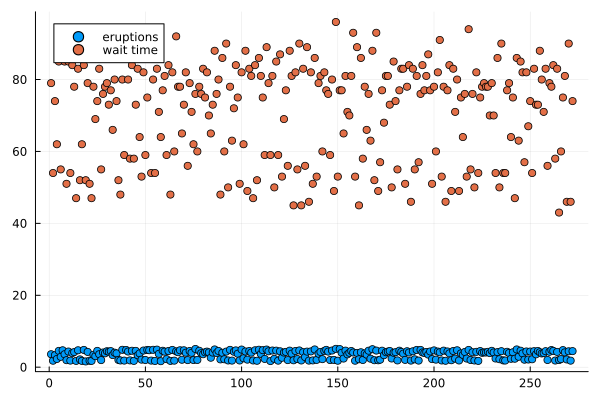

In [29]:
eruptions = D[!,:Eruptions] #from D, we only take the Eruptions column & all rows ; bang means we do not want to create a copy but access the data directly
scatter(eruptions,label="eruptions")
waittime = D[!,:Waiting]
scatter!(waittime,label="wait time") #here we use the bang to denote that we want to modify the s´plot we created earlier 

### 🔵Statistics plots
As you can see, this doesn't tell us much about the data... Let's try some statistical plots

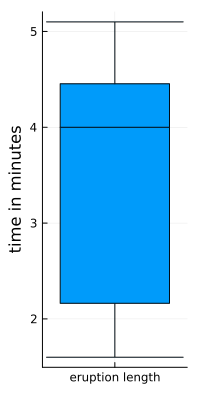

In [49]:
boxplot(["eruption length"], #this will be the name of the box plot / the name seen on the x-axis
    eruptions, #we need to select which data we want to plot
    legend=false, #we turn the legend off
    size=(200,400), #specifying the size of the plot
    whisker_width=1, #specifying the width of the wiskers
    ylabel="time in minutes") #labelling the y-axis

Statistical plots such as a box plot (and a violin plot as we will see in notebook `12. Visualization`), can provide a much better understanding of the data. Here, we immediately see that the median time of each eruption is about 4 minutes.

The next plot we will see is a histogram plot.

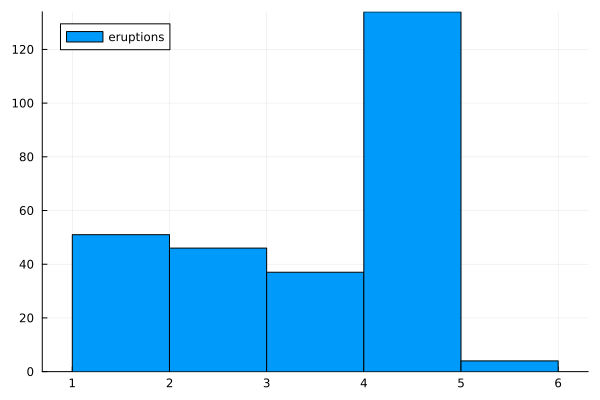

In [51]:
histogram(eruptions, #telling which data we want to plot
    label="eruptions") #specifying the label

You can adjust the number of bins manually or by passing a one of the autobinning functions.

In [53]:
?histogram

search: histogram histogram! Histogram histogram2d ea_histogram histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins::Union{Integer, Symbol, Tuple{Integer, Integer},          AbstractVector}`: Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`. Aliases: (:bin, :nb,          :nbin, :nbins).
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize::Union{Bool, Symbol}`: Histogram normalization               mode. Possible values are: false/:none (no               normalization, default), true/:pdf (normalize to a discrete               PDF, where the total area of the bins is 1),               :probability (bin heights sum to 1) and :density (the area               of each bin, rather than the height, is equal to               the counts - useful for uneven bin sizes).               Aliases: (:norm, :normalized, :normalizes, :normed).
  * `bar_position::Symbol`: Choose from `:overlay` (default),                  `:stack`. (warning: may only be partially                  implemented). Aliases: (:bar_positions, :barpositions).
  * `bar_width::Real`:  Width of bars in data coordinates. When               `nothing`, chooses based on `x` (or `y` when               `orientation = :h`). Aliases: (:bar_widths, :barwidths).
  * `bar_edges::Bool`: Align bars to edges (true), or centers               (the default) ?.
  * `permute::Tuple{Symbol, Symbol}`: Permutes data and axis             properties of the axes given in the tuple, e.g. (:x, :y).             Aliases: (:permutes,).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```


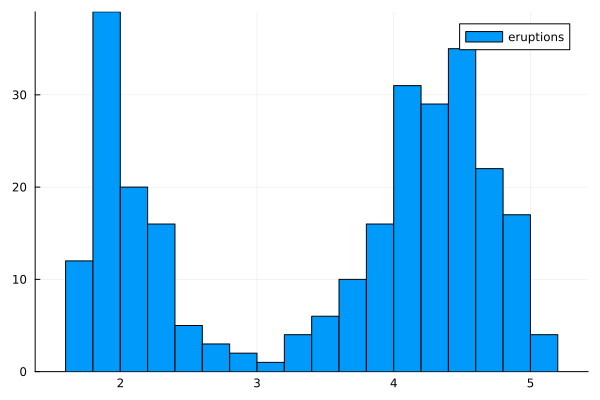

In [55]:
histogram(eruptions,bins=:sqrt,label="eruptions")

### 🔵Kernel density estimates
Next, we will see how we can fit a kernel density estimation function to our data. We will make use of the `KernelDensity.jl` package.

__Definition:__
KDE is a way to estimate the probability density function (PDF) of a continuous variable, based on sample data. It's like a smooth histogram. Instead of using bars like a histogram, KDE places a smooth kernel function (often a Gaussian bell curve) at each data point, then adds them up to create a smooth curve that represents the distribution

In [70]:
p=kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442217305e-5, 1.1244427155304715e-5, 1.1344179473224414e-5, 1.146054328619861e-5, 1.1593684794655723e-5, 1.1743789689266926e-5, 1.1911063348919726e-5, 1.2095731053138326e-5, 1.2298038211913664e-5, 1.2518250611666393e-5  …  1.1215022627797389e-5, 1.113759304488017e-5, 1.1076192604056456e-5, 1.1030781609218734e-5, 1.1001338720893414e-5, 1.0987860983070058e-5, 1.0990363864678623e-5, 1.1008881316295835e-5, 1.1043465842321826e-5, 1.1094188587988663e-5])

If we want the histogram and the kernel density graph to be aligned we need to remember that the "density contribution" of every point added to one of these histograms is `1/(nb of elements)*bin width`. Read more about kernel density estimates on its wikipedia page https://en.wikipedia.org/wiki/Kernel_density_estimation

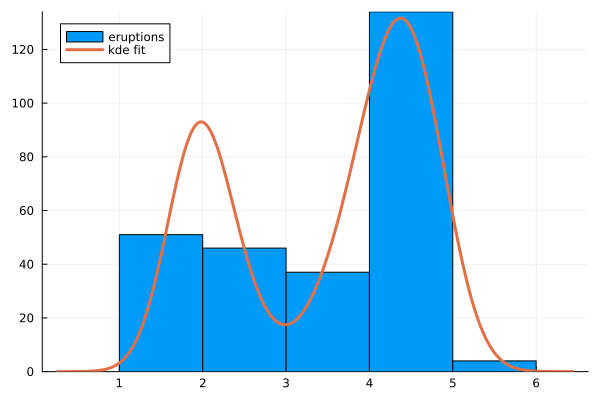

In [74]:
histogram(eruptions,label="eruptions")
plot!(p.x, #we are modifying the existing plot (aka the histogram) & p.x refer to the x-values of my kde function
    p.density .* length(eruptions), #p-density contains the matching values at p.x and we multiply by length(eruptions) to scale density to histogram scale
    linewidth=3,
    color=2,
    label="kde fit") # nb of elements*bin width

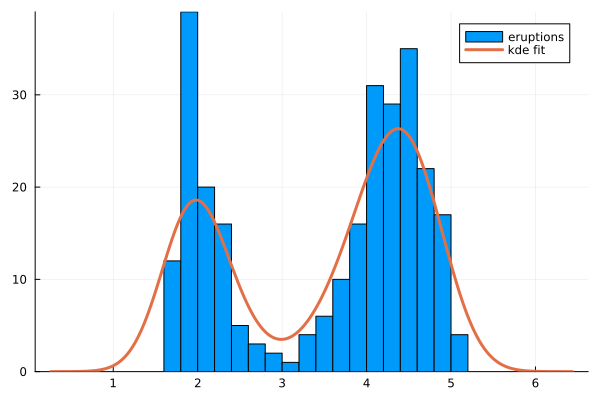

In [82]:
histogram(eruptions,bins=:sqrt,label="eruptions") #and we are re-scaling
plot!(p.x,
    p.density .* length(eruptions) .*0.2, #here we scale it further down
    linewidth=3,
    color=2,
    label="kde fit") # nb of elements*bin width

Next, we will take a look at one probablity distribution, namely the normal distribution and verify that it generates a bell curve.

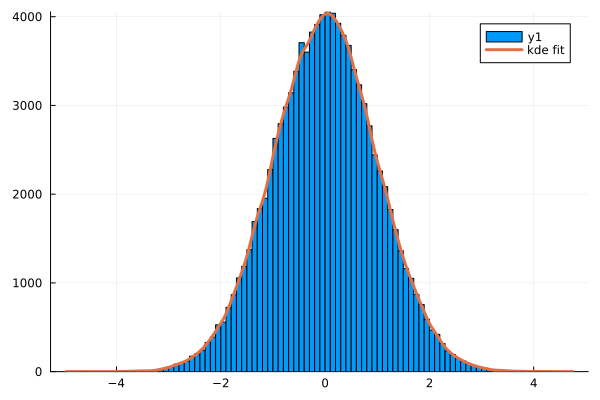

In [90]:
myrandomvector = randn(100_000) #we are creating a random vector
histogram(myrandomvector) #let's put this in a histogram
p=kde(myrandomvector) #generate the kde
plot!(p.x,
    p.density .* length(myrandomvector) .*0.1,
    linewidth=3,
    color=2,
    label="kde fit") # nb of elements*bin width

### 🔵Probability distributions
Another way to generate the same plot is via using the `Distributions` package and choosing the probability distribution you want, and then drawing random numbers from it. As an example, we will use `d = Normal()` below.

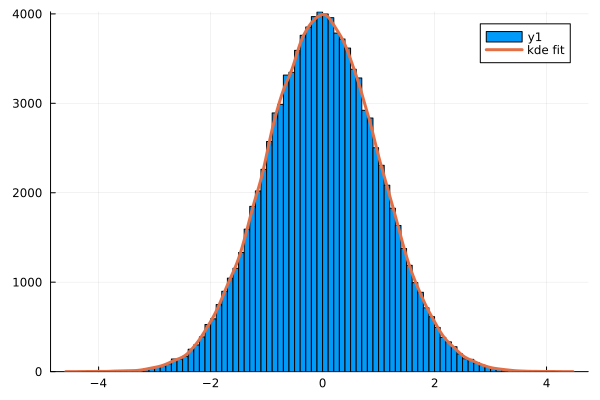

In [100]:
d = Normal() #we want to generate a normal distribution
myrandomvector = rand(d,100000) #we are drawing 100000 random samples from d
histogram(myrandomvector) #let's plot a histogram
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

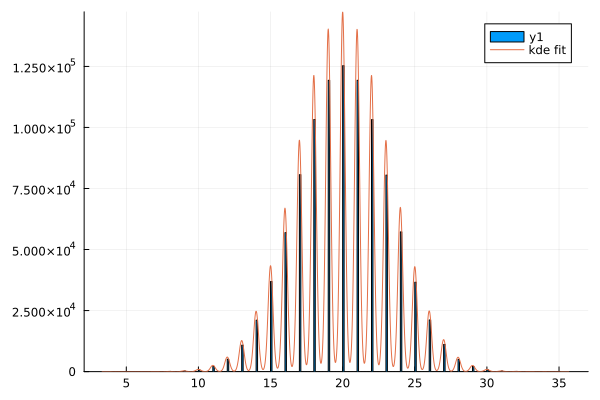

In [106]:
b = Binomial(40) #let's create a binomial distribution with 40 trials
myrandomvector = rand(b,1000000) #drawing from b
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width 

Next, we will try to fit a given set of numbers to a distribution.

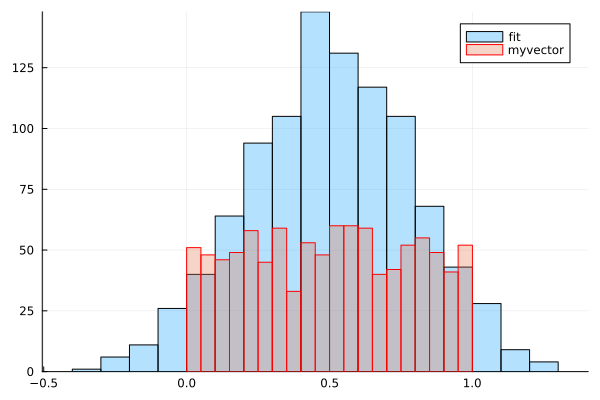

In [116]:
x = rand(1000) #creating a 1000-element vector with values between 0 and 1
d = fit(Normal, x) #drawing to fit a normal distribution based on the values that we obtained
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

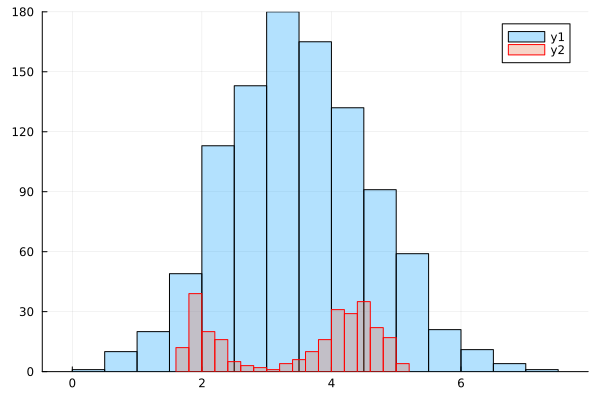

In [118]:
x = eruptions
d = fit(Normal, x) 
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

### 🔵Hypothesis testing
Next, we will perform hypothesis testing using the `HypothesisTests.jl` package.

In [120]:
?OneSampleTTest

search: OneSampleTTest OneSampleZTest OneSampleADTest TwoSampleTTest



```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

!!! note
    This test is also known as a t-test for paired or dependent samples, see [paired difference test](https://en.wikipedia.org/wiki/Paired_difference_test) on Wikipedia.



In [122]:
myrandomvector = randn(1000) #we created a random vector based on the standard normal distribution
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0200839
    95% confidence interval: (-0.04186, 0.08203)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5248

Details:
    number of observations:   1000
    t-statistic:              0.6362368336061293
    degrees of freedom:       999
    empirical standard error: 0.03156673338727308


In [124]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.352, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


A note about p-values: Currently using the pvalue of spearman and pearson correlation from Python. But you can follow the formula here to implement your own.
https://stackoverflow.com/questions/53345724/how-to-use-julia-to-compute-the-pearson-correlation-coefficient-with-p-value

Hint: Sometimes there are some issues getting Python and Julia to communicate as desired. One of the problems that might come up `Cannot load libmkl_intel_thread.dylib` can be solved by: 
```
using Conda
Conda.rm("mkl")
Conda.add("nomkl")
```

In [175]:
#fixing the error that I always got in the next code cell
#using PyCall
#PyCall.pyimport_conda("scipy.stats", "scipy")

In [140]:
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

scipy_stats.spearmanr(eruptions, waittime) = (0.7779720576516121, 1.989541990656138e-56)
scipy_stats.pearsonr(eruptions, waittime) = (0.9008111683218132, 8.129958506615478e-100)


(0.9008111683218132, 8.129958506615478e-100)

In [142]:
scipy_stats.pearsonr(eruptions,waittime)
#gives us the pearson correlation value AND the p-value 

(0.9008111683218132, 8.129958506615478e-100)

In [144]:
corspearman(eruptions,waittime)

0.7779720576516121

In [145]:
cor(eruptions,waittime) #this displays the pearson one

0.900811168321813

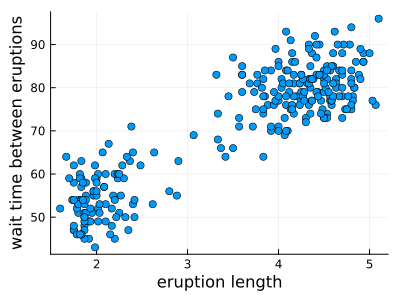

In [160]:
scatter(eruptions,
    waittime,
    xlabel="eruption length",
    ylabel="wait time between eruptions",
    legend=false,
    grid=true,
    size=(400,300))

Interesting! This means that the next time you visit Yellowstone National part ot see the faithful geysser and you have to wait for too long for it to go off, you will likely get a longer eruption! 

### 🔵AUC and Confusion matrix
Finally, we will cover basic tools you will need such as AUC scores or confusion matrix. We use the `MLBase` package for that.

__Confusion Matrix__
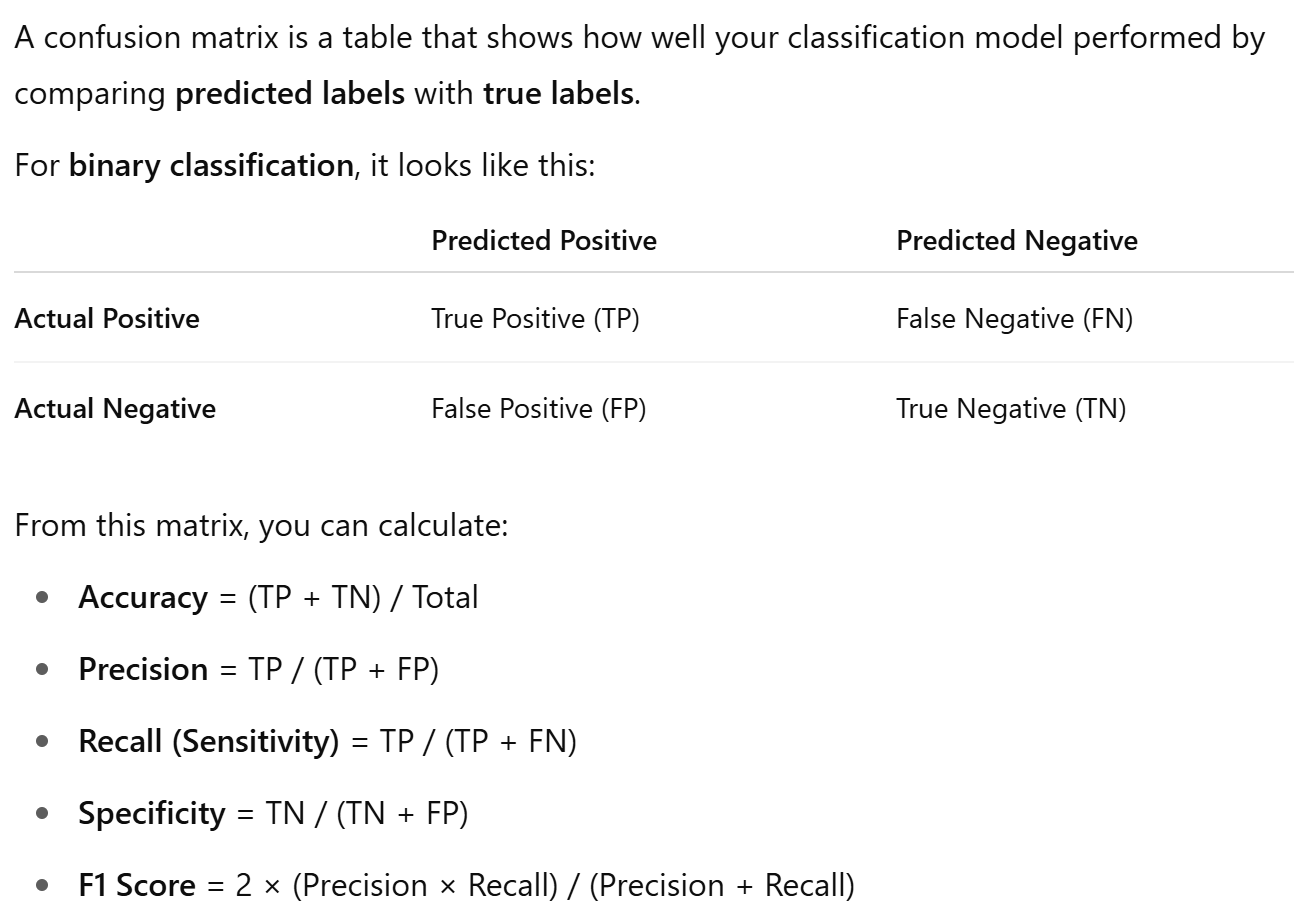

__Area Under the Curve__
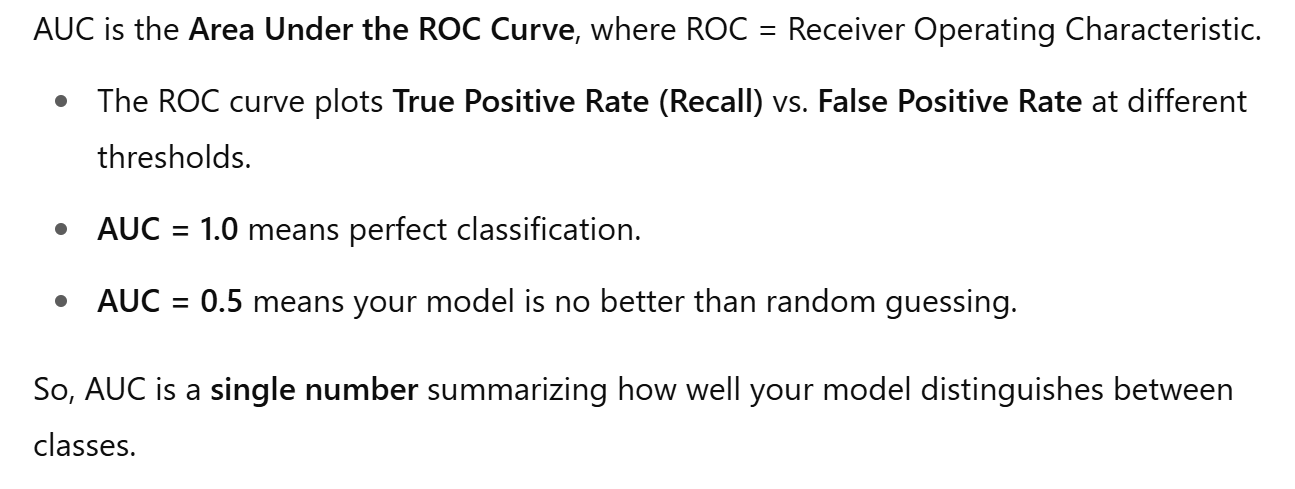

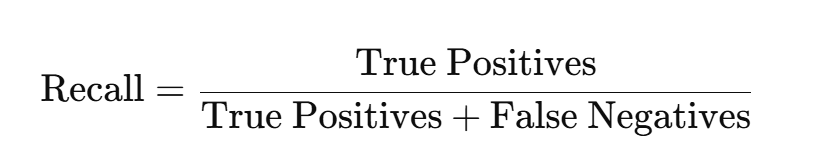
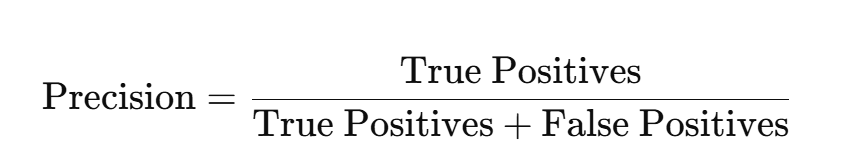

In [150]:
gt = [1, 1, 1, 1, 1, 1, 1, 2] #this is the ground truth
pred = [1, 1, 2, 2, 1, 1, 1, 1] #these are the model predictions
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred) #use in the built-in function
C = confusmat(2, gt, pred)  #re-initialise the function  

2×2 Matrix{Int64}:
 5  2
 1  0

In [170]:
gt = [1, 1, 1, 1, 1, 1, 1, 0]; #ground truth
pred = [1, 1, 0, 0, 1, 1, 1, 1] #model predictions
ROC = MLBase.roc(gt,pred) #get data for the ROC curve
recall(ROC)  #true positive rate
precision(ROC) #precision

0.8333333333333334

# Finally...
After finishing this notebook, you should be able to:
- [ ] generate statistics plots such as box plot, histogram, and kernel densities
- [ ] generate distributions in Julia, and draw random numbers accordingly
- [ ] fit a given set of numbers to a distribution
- [ ] compute basic evaluation metrics such as AUC and confusion matrix
- [ ] run hypothesis testing
- [ ] compute correlations and p-values

# 🥳 One cool finding
<img src="data/faithful.JPG" width="300">

If you go Yellowstone national park and you find out that the old faithful geyser is taking too long to erupt, then the wait might be worth it because you are likely to experience a longer eruption (i.e. there seems to be a high correlation between wait time and eruption time).

<img src="data/0301.png" width="400">
